Now, to understand how the data is correlated with one another, we plot the correlation heatmaps for both, the city data and the station data.

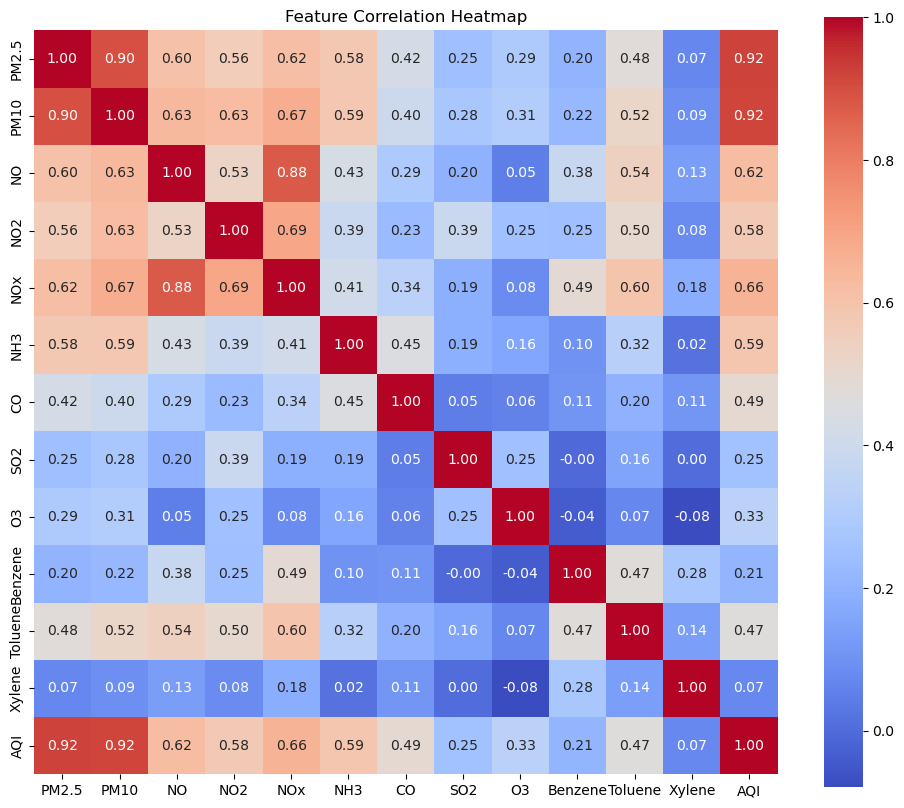

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('city_day_clean.csv')

# Compute correlation matrix for numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

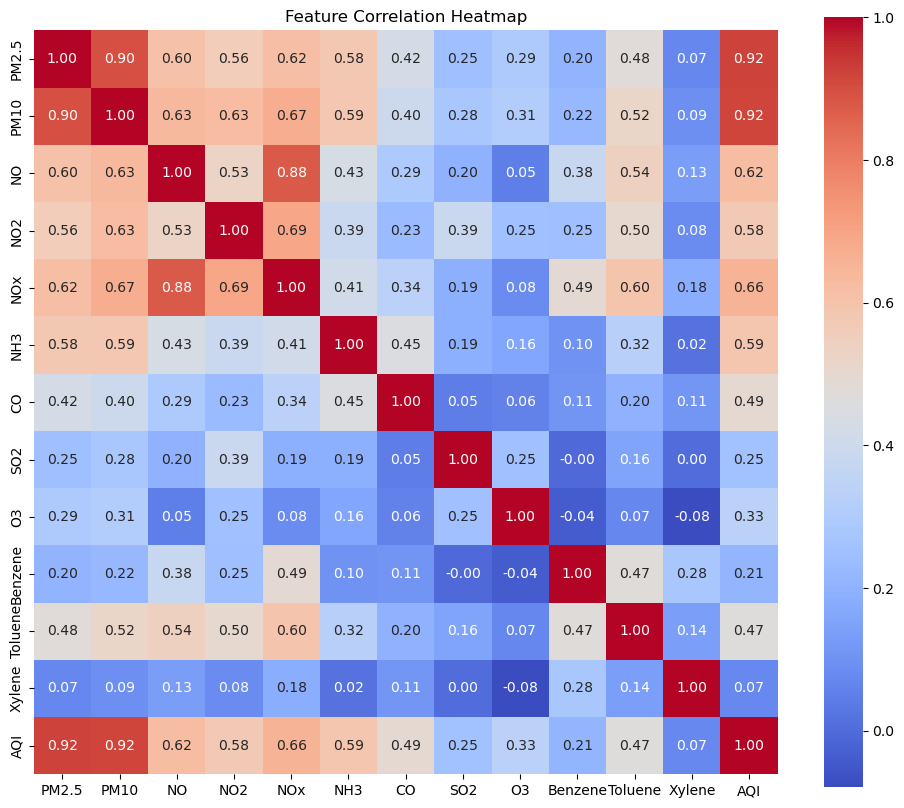

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
af = pd.read_csv('station_day_clean.csv')

#Computing the correlation matrix for numeric columns
corr_matrix = af.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

Now that we have the heatmap correlation for all features and targets, we wish to understand the distribution of each feature and target column, and so we plot their distribution as histographs.

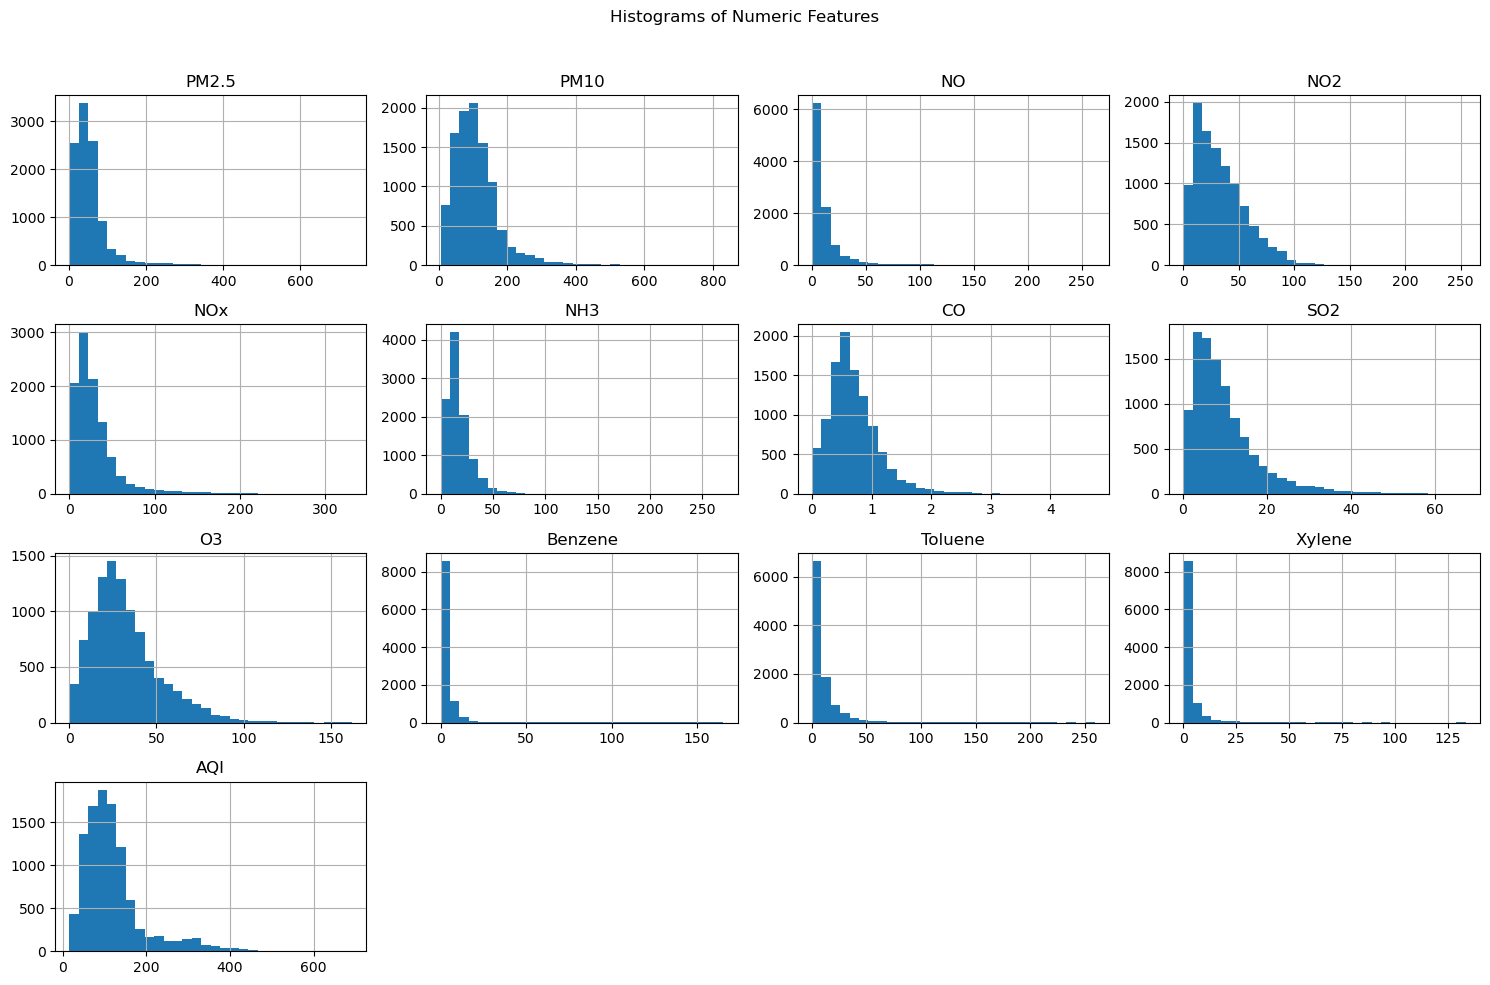

In [4]:
numeric_cols = df.select_dtypes(include='number').columns

df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Boxplots will help us to analyze the outliers in data and inform us on general statistics of the data. They are already a widely used EDA technique which we too shall utilize.

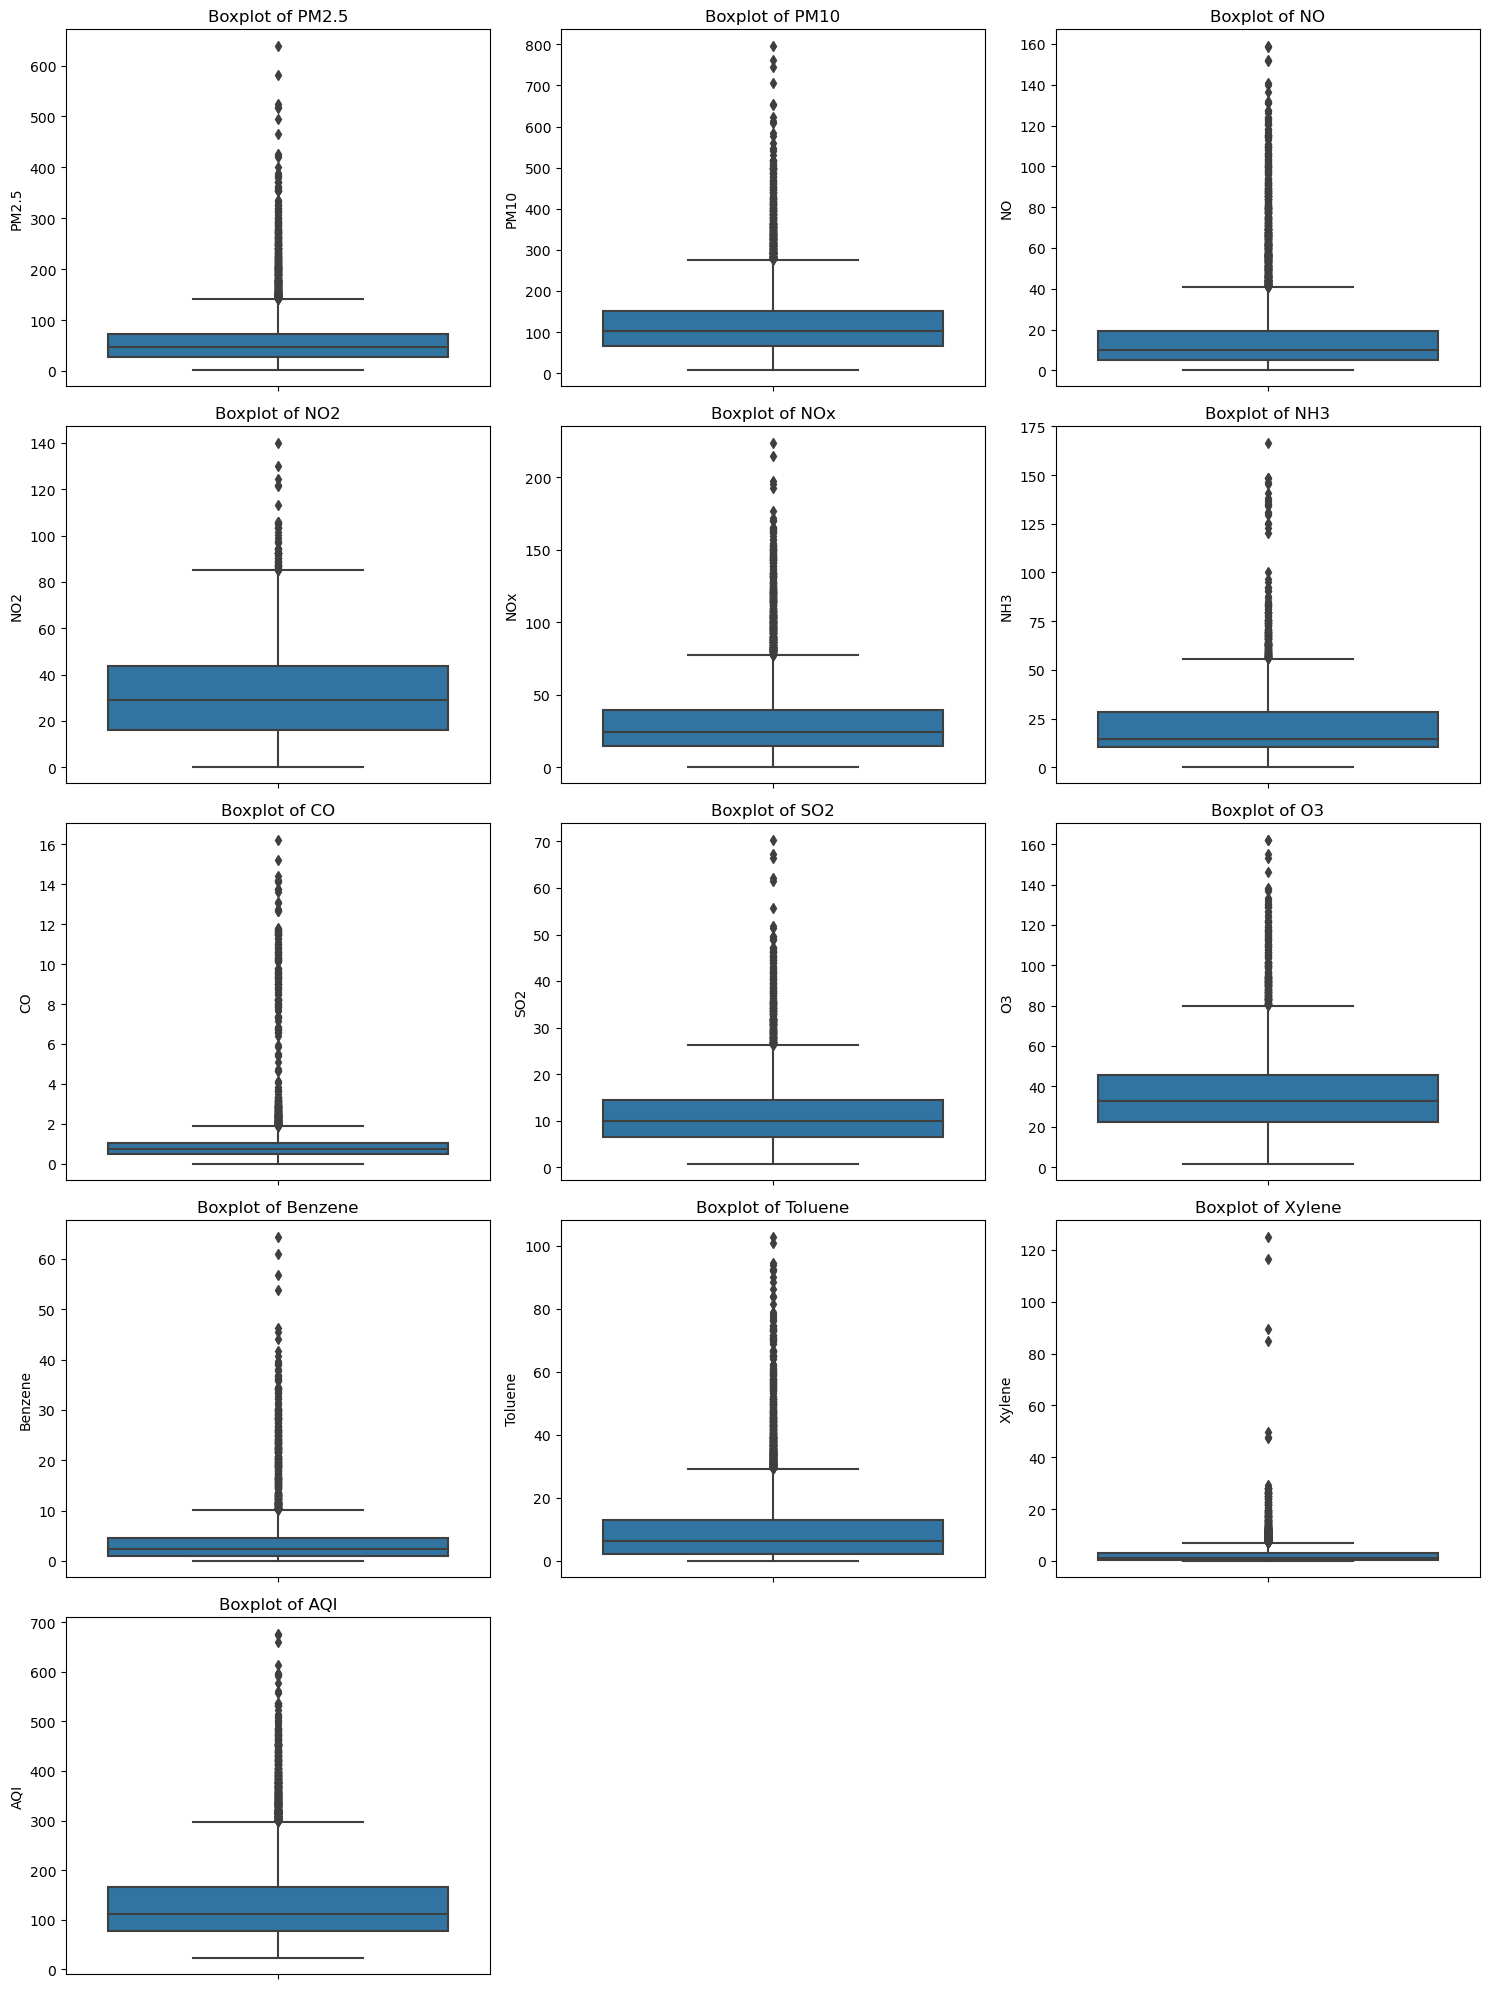

In [15]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('station_day_clean.csv')

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

num_plots = len(numeric_cols)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(5 * num_cols, 4 * num_rows))

for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

The Distribution of AQI Plotted:

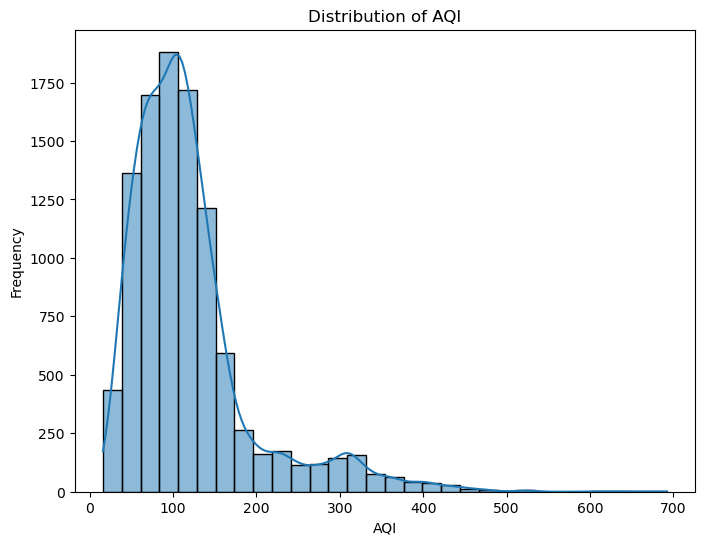

In [7]:
if 'AQI' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['AQI'], kde=True, bins=30)
    plt.title('Distribution of AQI')
    plt.xlabel('AQI')
    plt.ylabel('Frequency')
    plt.show()

Now, the plotting of pairplots helps us to identify clusters, outliers and understand the pairwise relationship all the different variables. The scatterplot matrices are very useful in helping us identify important variables.

C:\Users\Mannan Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


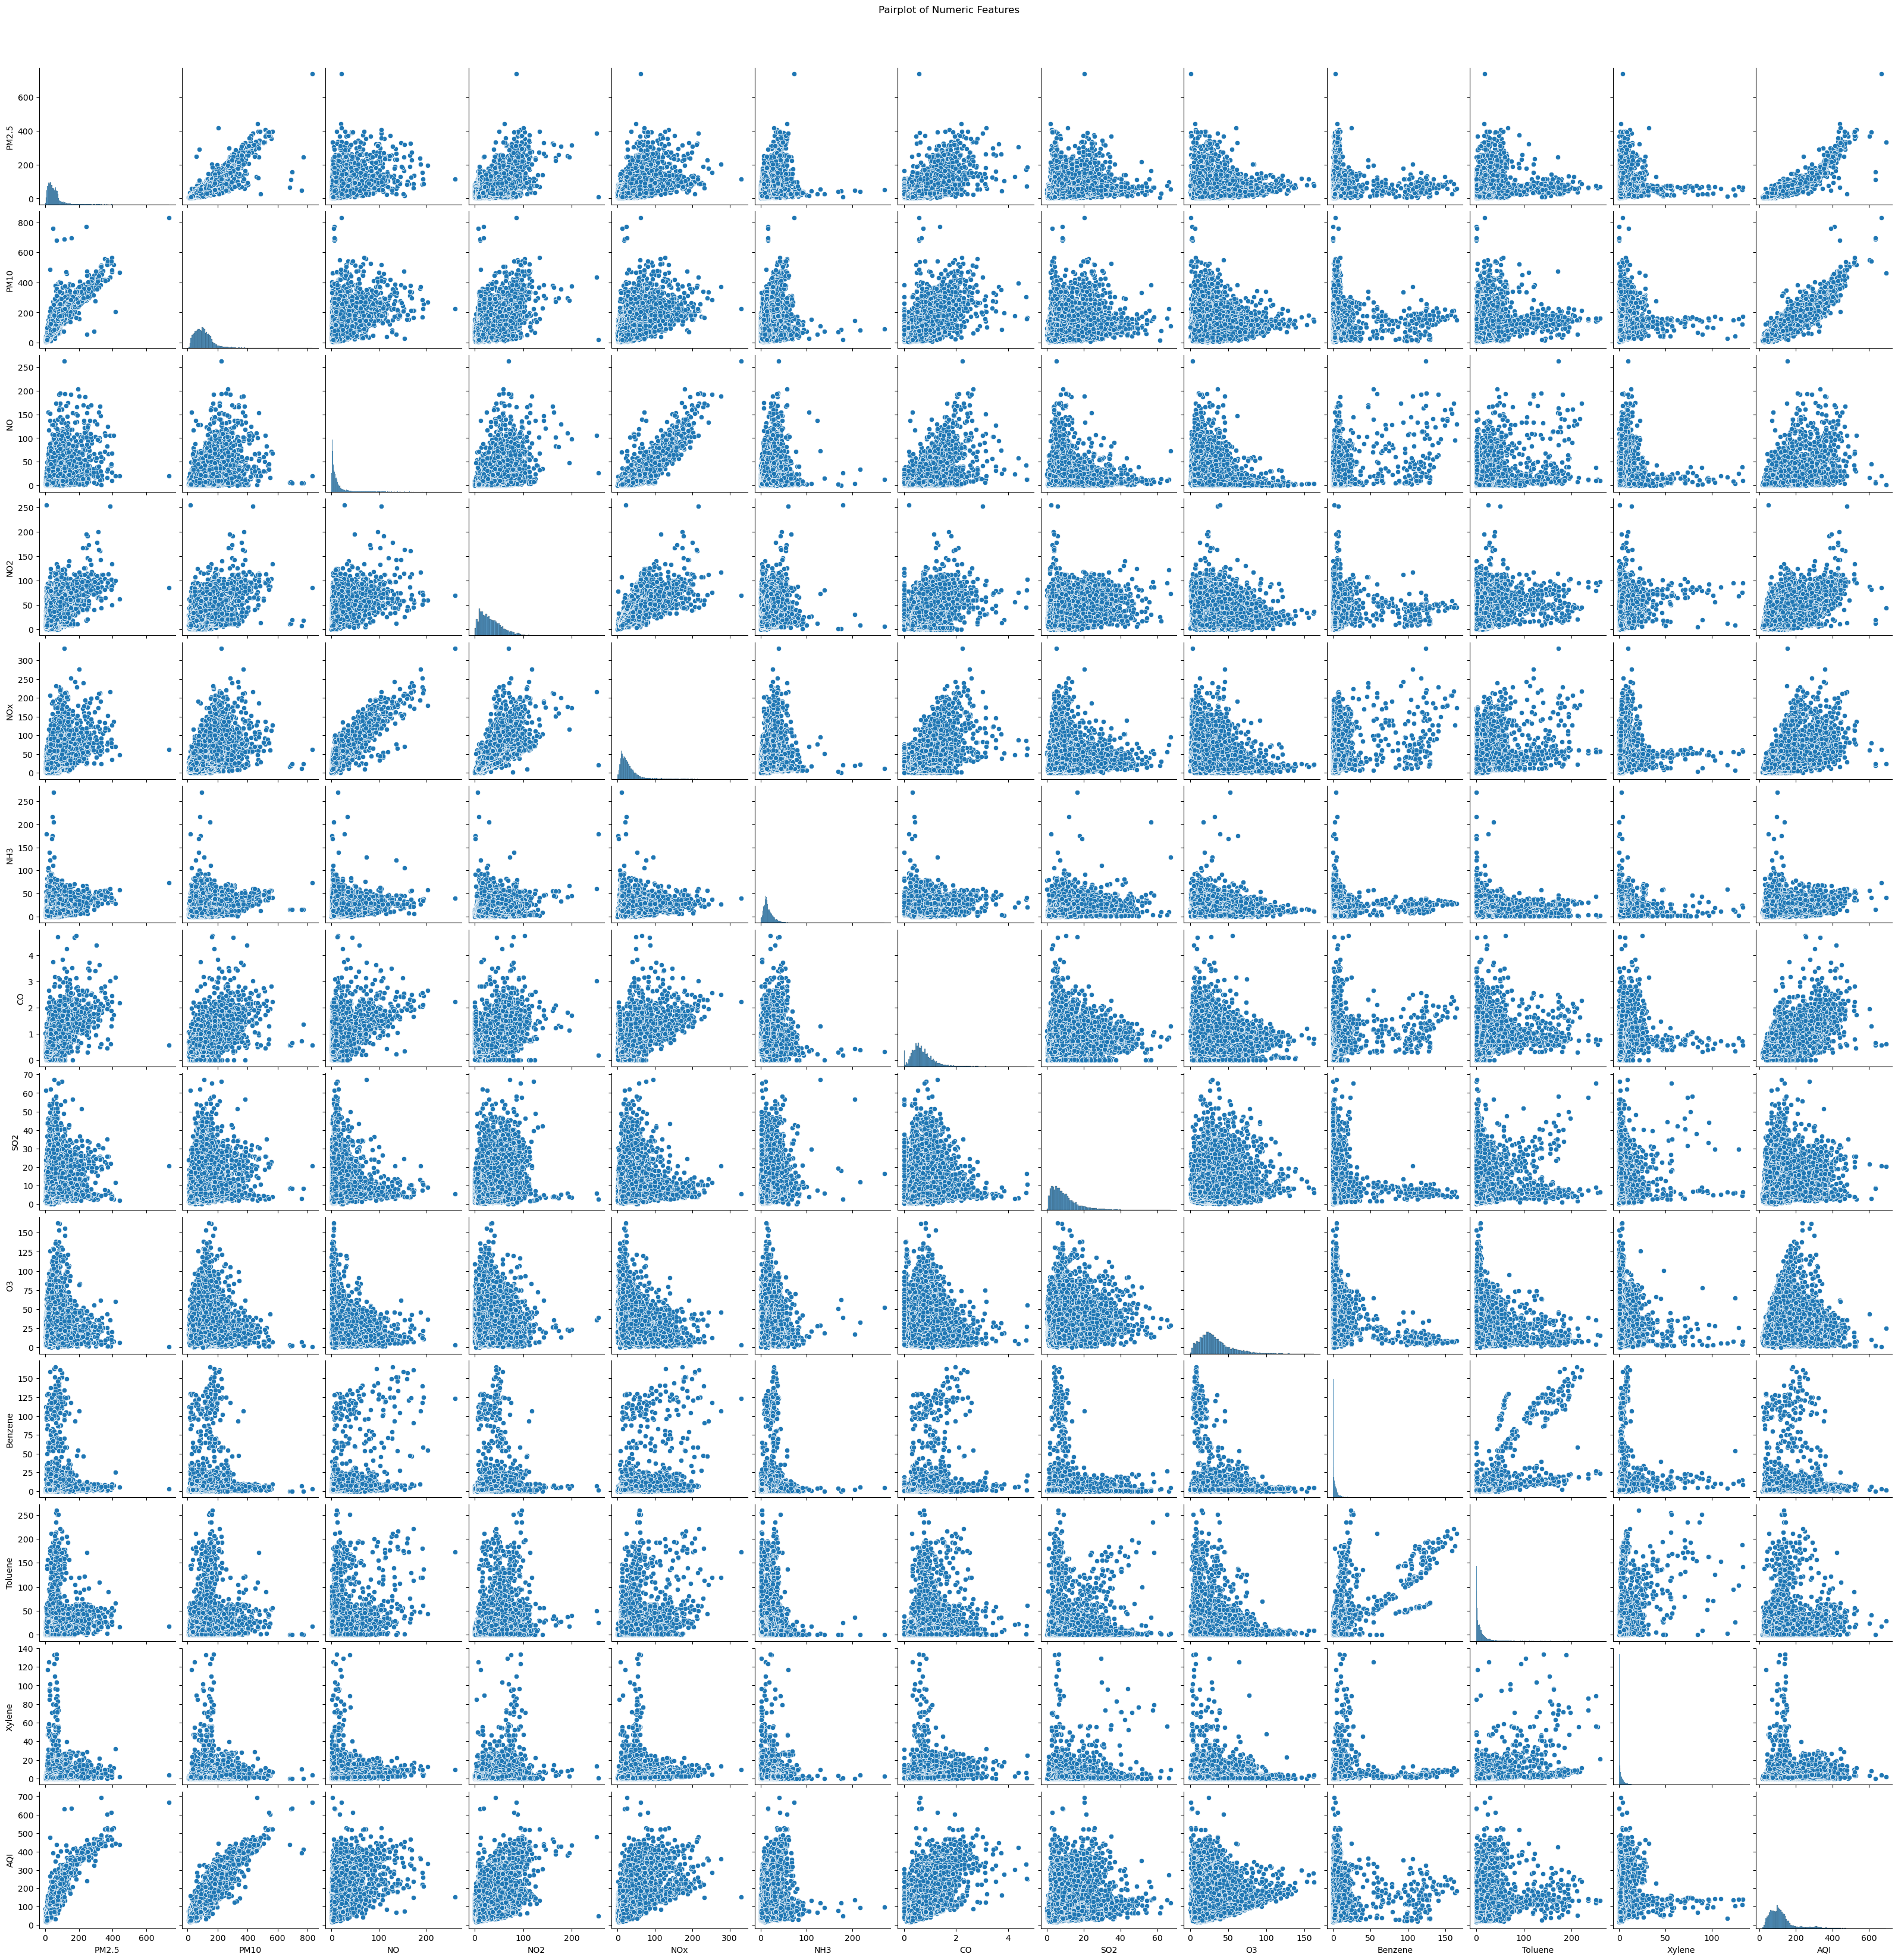

In [8]:
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

We now wish to get some hard numerical statistics about our data, regarding the standard deviations, mean, quartiles etc. about our data, and so we output that using Pandas.

In [11]:
import pandas as pd

df = pd.read_csv('station_day_clean.csv')

print("Summary Statistics:")
print(df.describe())

Summary Statistics:
             PM2.5         PM10           NO          NO2          NOx  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     61.327365   123.418321    17.015191    31.708190    32.448956   
std      53.709682    85.791491    20.037836    18.784041    27.388129   
min       2.000000     7.800000     0.250000     0.170000     0.170000   
25%      27.927500    66.970000     5.080000    15.977500    14.547500   
50%      47.490000   103.010000    10.060000    28.900000    24.285000   
75%      73.442500   150.770000    19.392500    43.632500    39.622500   
max     639.190000   796.880000   159.220000   140.170000   224.090000   

               NH3           CO          SO2           O3      Benzene  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     20.737070     0.984344    11.514426    36.127691     3.700361   
std      16.088215     1.356161     7.166113    19.553695     5.062159   
min       0.12000

Now as we see from the Correlation Heatmap, the PM2.5 and PM10 columns have a very high correlation not only with one another, but also with the AQI, our target variable. These high correlations could hinder in the performance of our models and so we wish to understand the relationship between PM2.5 and AQI and PM10 and AQI, and we do this using scatter plot distributions which help us identify whether the relationships are linear or complex.

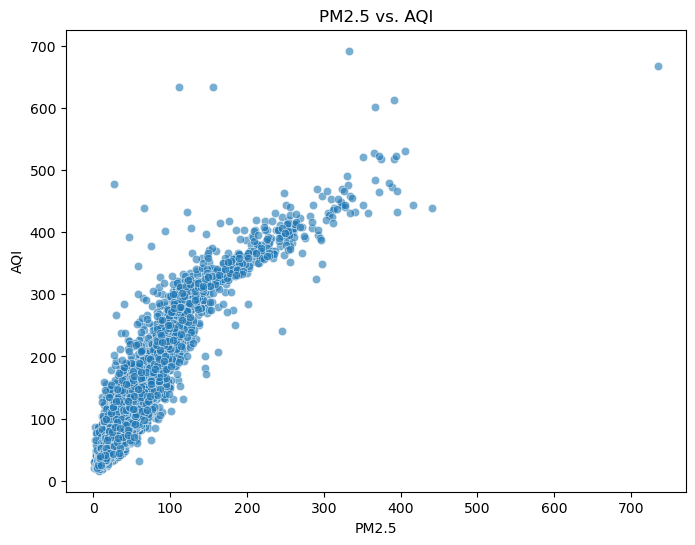

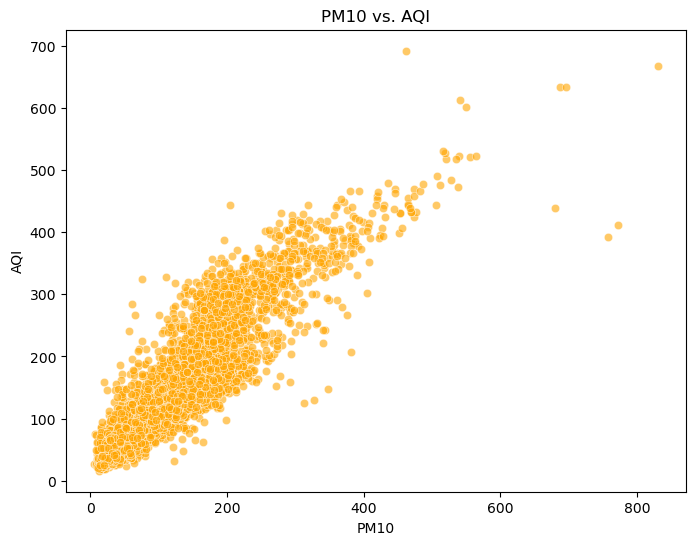

In [10]:
#Scatter plot: PM2.5 vs. AQI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM2.5', y='AQI', data=df, alpha=0.6)
plt.title('PM2.5 vs. AQI')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()

#Scatter plot: PM10 vs. AQI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM10', y='AQI', data=df, alpha=0.6, color='orange')
plt.title('PM10 vs. AQI')
plt.xlabel('PM10')
plt.ylabel('AQI')
plt.show()

As we wish to use our models to limit AQI so that it is never beyond satisfactory, it might help us to understand the distribution of AQI as a continuous random variable and then plotting the CDF (cumulative density function), because then we will be able to calculate the probability that the AQI is under or over a certain level. That is, if AQI $\tilde X$ such that $X$ is a continuous random variable, then $F_X(x) = P(X\leq x)$ is a very useful function.

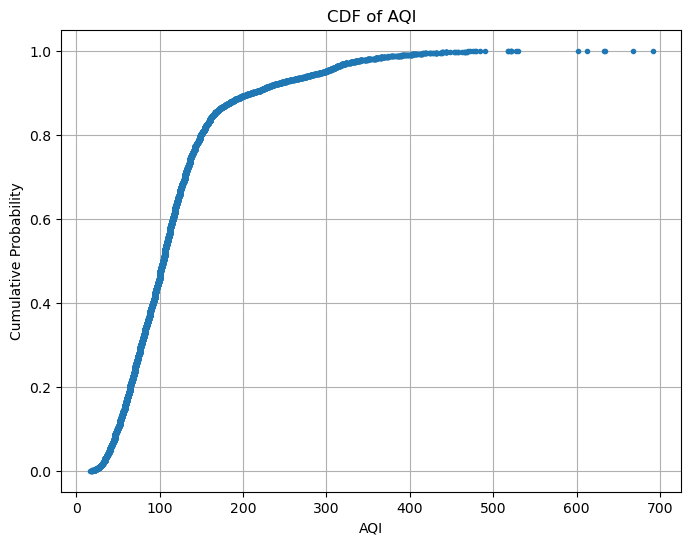

In [12]:
import numpy as np

plt.figure(figsize=(8, 6))
sorted_aqi = np.sort(df['AQI'])
cdf = np.arange(len(sorted_aqi)) / float(len(sorted_aqi))
plt.plot(sorted_aqi, cdf, marker='.', linestyle='none')
plt.title('CDF of AQI')
plt.xlabel('AQI')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

Similar to the CDF plotting, the Kernel Density Estimation (KDE) Plotting helps us identify the distribution of AQI, only in a much more detailed way, as CDF allows us to see the distribution upto each data point thereby aggregating over data, whereas in the KDE plotting we see the distribution of AQI at each point making it much easier for us to identify any unusual patterns and such. We can analyze the Modality and the Skewness of the Data as well. For example, clearly the AQI is unimodally distributed. 

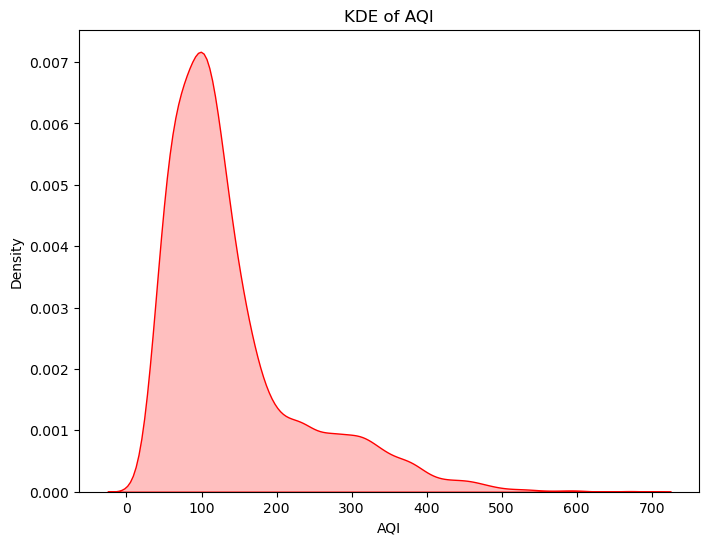

In [8]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['AQI'], fill=True, color='red')
plt.title('KDE of AQI')
plt.xlabel('AQI')
plt.ylabel('Density')
plt.show()